<a href="https://colab.research.google.com/github/Corry-Grodek/DataScience/blob/main/Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import bambi as bmb
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-hlm02ib2
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-hlm02ib2
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Fitting a curve with a polynomial model is often quicker to run and easier to set up. It is also easy to change the model by changing the degree.**

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Polynomials work better with more complicated relationshipss, and can overfit if the degree is higher than neccesary. More degrees also take longer to run.**

**Task3**:

What's the point of using b splines?

**B Splines make it less likely to overfit and we can control the knot locations, making it a little more flexible**

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**A Gaussian proccess uses each data point as a knot, and the relationships from one data point to another is the relationship of the data. GPs are similar to Neural Networks but allow us to have more input**

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


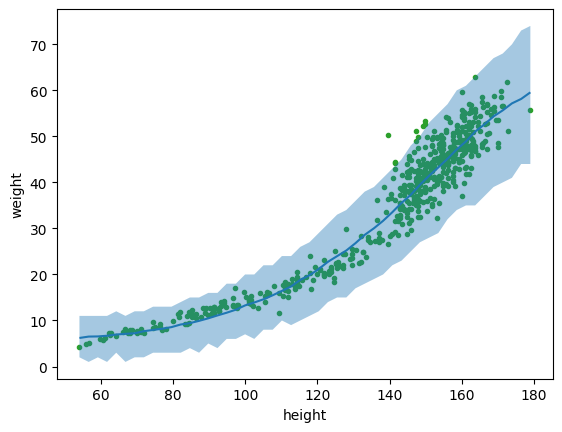

In [ ]:
model_poly3 = bmb.Model("weight ~ poly(height, degree=3)", howell, family="negativebinomial")
idata_poly3 = model_poly3.fit()

bmb.interpret.plot_predictions(model_poly3, idata_poly3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**I thought it was really interesting to see how the things we learn about corrleated to physical proccesses, like how the prior for age of the samples was because of the uncertainty in the amount of snow that fell each year, leading to different spacing of years. I think the idea of using the data points as knots made more sense in the first co2/year distribution, because there was clearly more uncertainty where there was less data points.**

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

**I enjoyed the second co2/year graph. It was cool to see how certain the model was for various parts of the data, and I liked the colors!**